# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [80]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [81]:
# Tampilkan 5 baris pertama dengan function head.
df = pd.read_csv('bank_transactions_data_edited.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [82]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [83]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

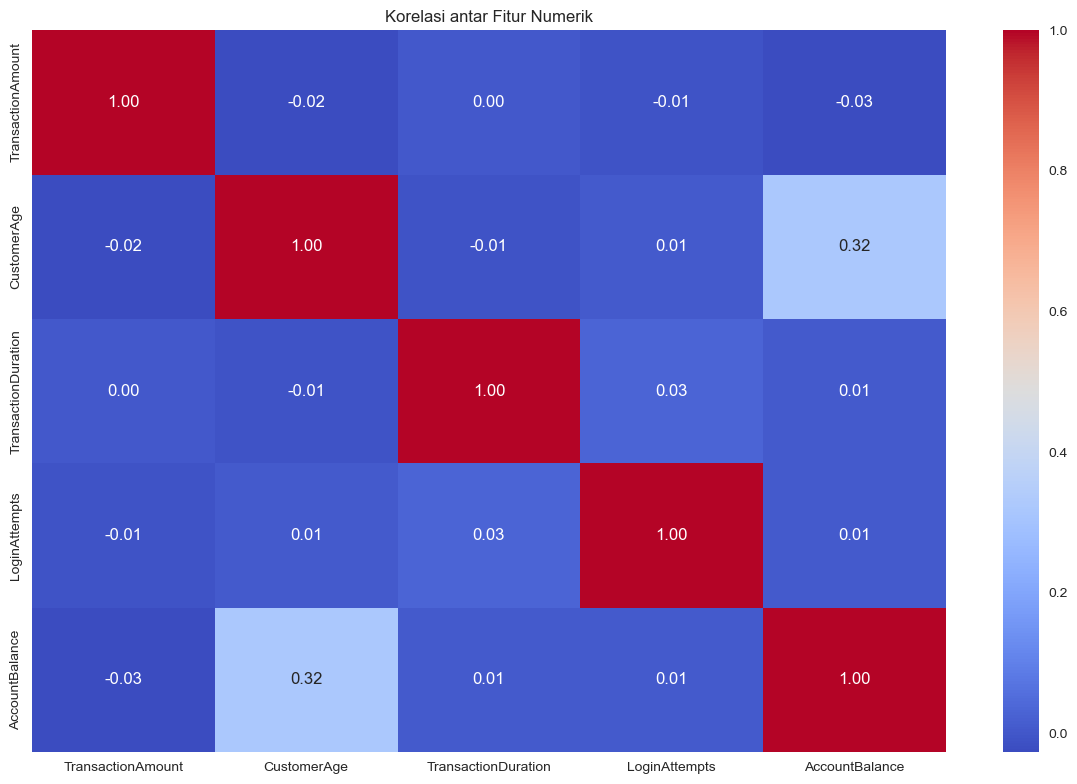

In [84]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

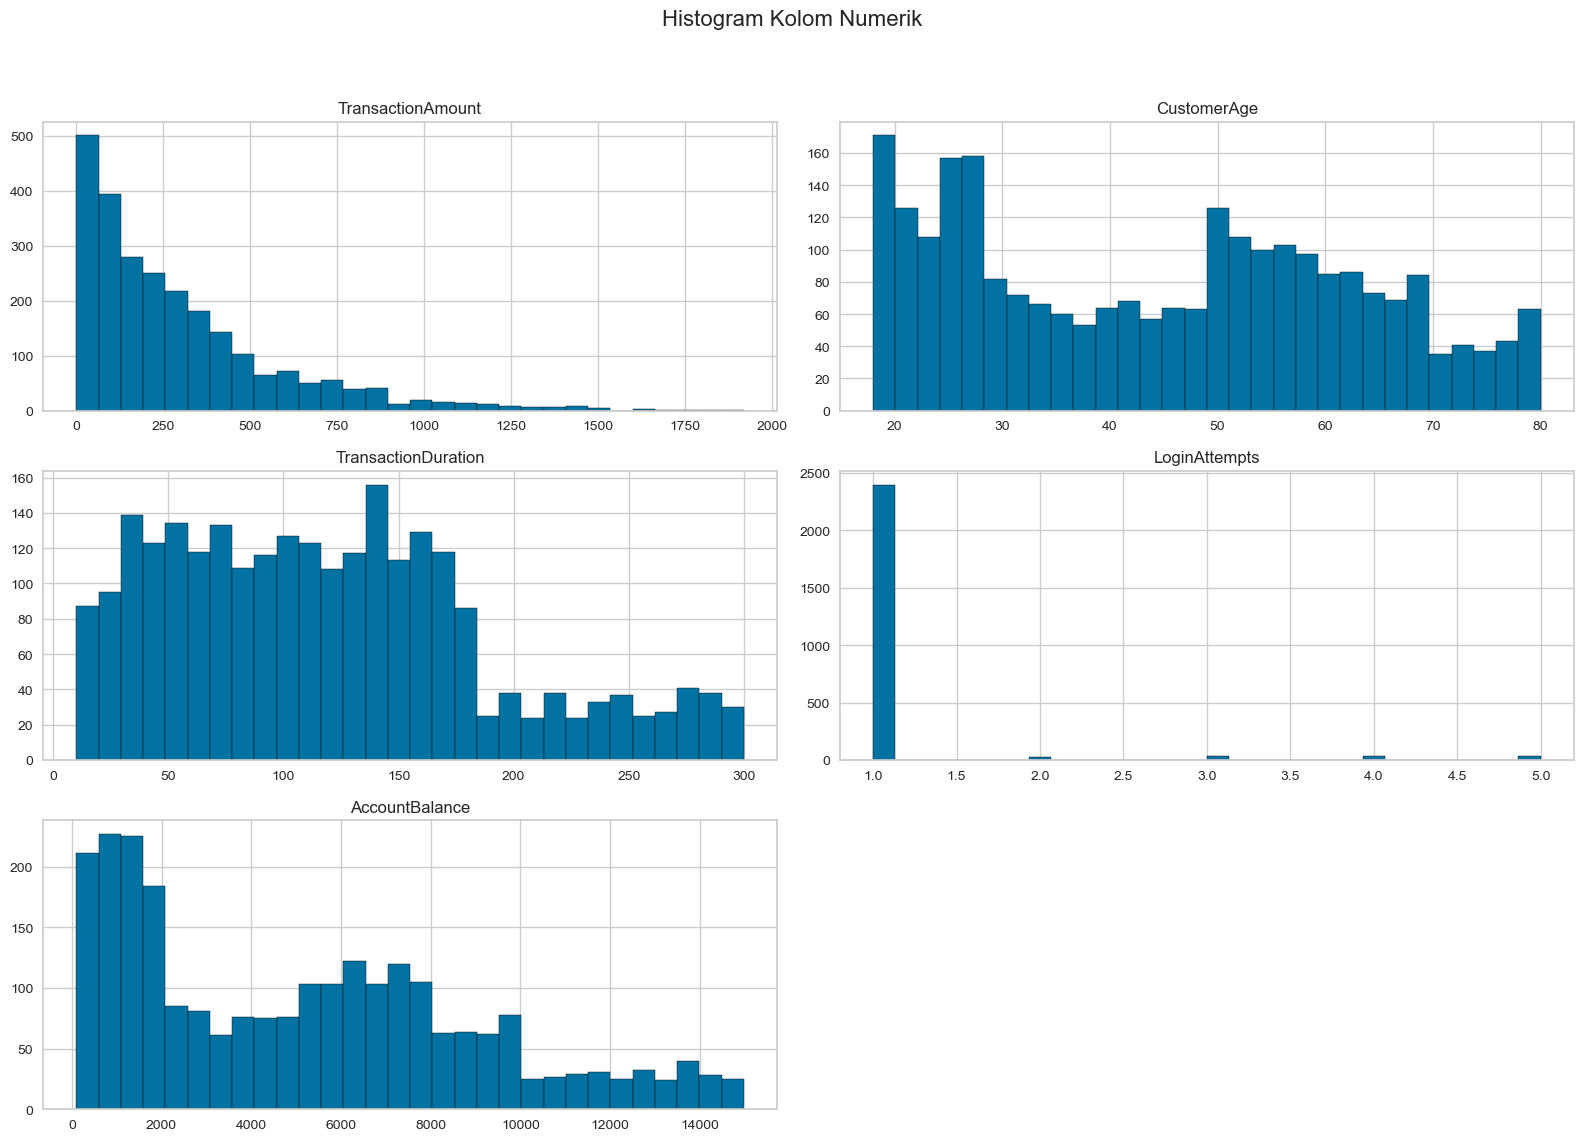

In [85]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histogram Kolom Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

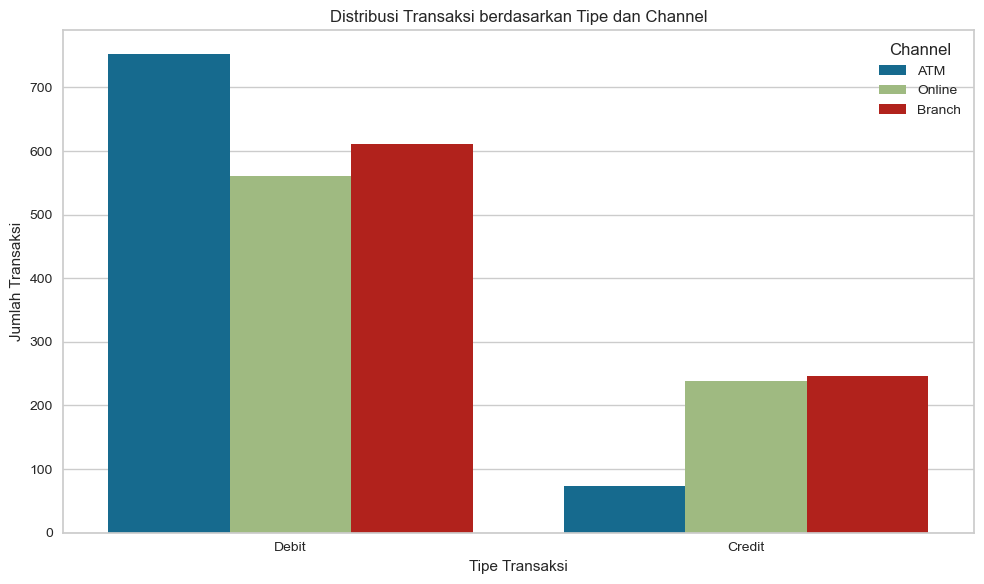

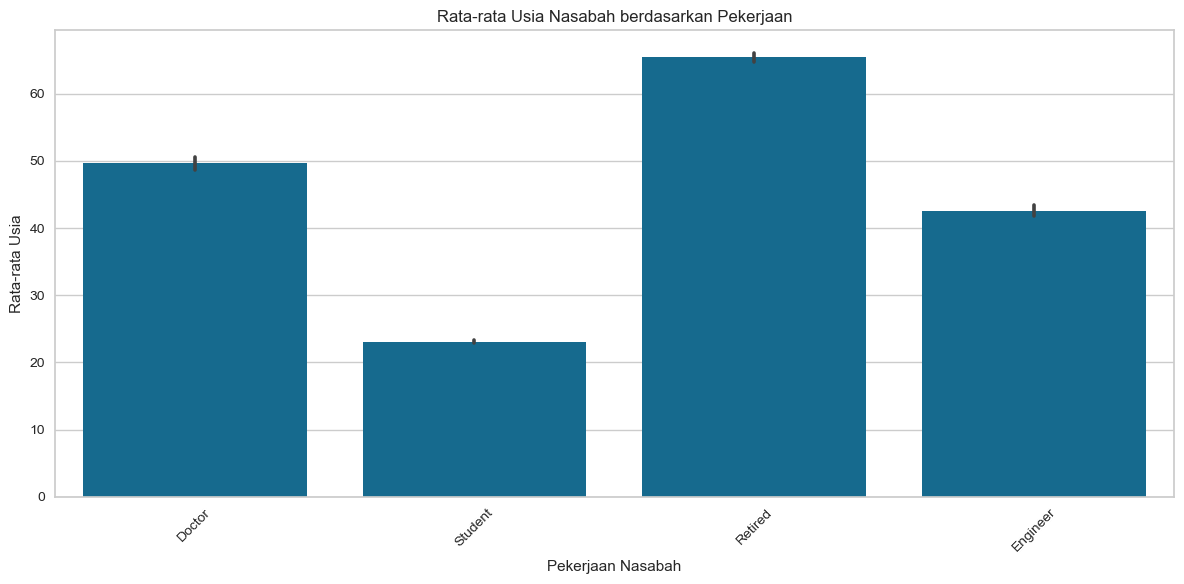

In [86]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionType', hue='Channel')
plt.title('Distribusi Transaksi berdasarkan Tipe dan Channel')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Tipe Transaksi')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='CustomerOccupation', y='CustomerAge')
plt.title('Rata-rata Usia Nasabah berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan Nasabah')
plt.ylabel('Rata-rata Usia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [87]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [88]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

21

In [89]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], inplace=True)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [90]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.fillna(df_numeric.median(), inplace=True)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# df.head()
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,0.435484,0.648276,0.0,0.492591


In [91]:
# Menggabungkan data numerik yang sudah di-scaling dengan data kategorikal
df_combined = pd.concat([df_scaled, df.drop(columns=df_numeric.columns)], axis=1)

In [92]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Melakukan One-Hot Encoding untuk fitur dengan sedikit kategori
df_combined = pd.get_dummies(df_combined, columns=['TransactionType', 'Channel'], drop_first=True)

# Melakukan Label Encoding untuk fitur dengan banyak kategori
label_encoder = LabelEncoder()
for col in ['Location', 'CustomerOccupation']:
    df_combined[col] = label_encoder.fit_transform(df_combined[col].astype(str))

# Mengecek hasil encoding
df_combined.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Location,CustomerOccupation,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online
0,0.007207,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,36,0,2024-11-04 08:08:08,True,False,False
1,0.195940,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,15,0,2024-11-04 08:09:35,True,False,False
2,0.065680,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,23,3,2024-11-04 08:07:04,True,False,True
3,0.096016,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,33,3,2024-11-04 08:09:06,True,False,True
4,0.006874,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,1,3,2024-11-04 08:06:39,False,False,True


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [93]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_combined.dropna(inplace=True)

df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2536
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2485 non-null   float64
 1   CustomerAge              2485 non-null   float64
 2   TransactionDuration      2485 non-null   float64
 3   LoginAttempts            2485 non-null   float64
 4   AccountBalance           2485 non-null   float64
 5   TransactionDate          2485 non-null   object 
 6   Location                 2485 non-null   int32  
 7   CustomerOccupation       2485 non-null   int32  
 8   PreviousTransactionDate  2485 non-null   object 
 9   TransactionType_Debit    2485 non-null   bool   
 10  Channel_Branch           2485 non-null   bool   
 11  Channel_Online           2485 non-null   bool   
dtypes: bool(3), float64(5), int32(2), object(2)
memory usage: 182.0+ KB


In [94]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_combined.drop_duplicates(inplace=True)

# df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2462 entries, 0 to 2535
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2462 non-null   float64
 1   CustomerAge              2462 non-null   float64
 2   TransactionDuration      2462 non-null   float64
 3   LoginAttempts            2462 non-null   float64
 4   AccountBalance           2462 non-null   float64
 5   TransactionDate          2462 non-null   object 
 6   Location                 2462 non-null   int32  
 7   CustomerOccupation       2462 non-null   int32  
 8   PreviousTransactionDate  2462 non-null   object 
 9   TransactionType_Debit    2462 non-null   bool   
 10  Channel_Branch           2462 non-null   bool   
 11  Channel_Online           2462 non-null   bool   
dtypes: bool(3), float64(5), int32(2), object(2)
memory usage: 180.3+ KB


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [95]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def detect_outliers_iqr(df_combined, column):
    Q1 = df_combined[column].quantile(0.25)
    Q3 = df_combined[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_combined[(df_combined[column] < lower_bound) | (df_combined[column] > upper_bound)]

# Mendeteksi jumlah outliers pada setiap kolom numerik
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

outlier_counts = {}
for col in numeric_columns:
    outliers = detect_outliers_iqr(df_combined, col)
    outlier_counts[col] = len(outliers)

print("Jumlah outliers pada setiap kolom:")
print(outlier_counts)

Jumlah outliers pada setiap kolom:
{'TransactionAmount': 111, 'CustomerAge': 0, 'TransactionDuration': 0, 'LoginAttempts': 119, 'AccountBalance': 0}


In [96]:
#Isi out;lier transcrion amount dengan batas IQR
Q1 = df_combined['TransactionAmount'].quantile(0.25)
Q3 = df_combined['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti nilai outliers dengan batas IQR
df_combined['TransactionAmount'] = df_combined['TransactionAmount'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Mengecek kembali jumlah outliers setelah imputasi
outliers_after = detect_outliers_iqr(df_combined, 'TransactionAmount')
print("\nJumlah Outliers TransactionAmount Setelah Imputasi:", len(outliers_after))



Jumlah Outliers TransactionAmount Setelah Imputasi: 0


In [97]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [98]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_combined.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,CustomerOccupation
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000
mean,0.147229,0.430675,0.377875,0.030666,0.338191,21.318440,1.526401
std,0.130202,0.286147,0.240787,0.148895,0.261010,12.415015,1.151256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043168,0.145161,0.182759,0.000000,0.095703,11.000000,0.000000
50%,0.110014,0.435484,0.351724,0.000000,0.311416,21.000000,2.000000
75%,0.213328,0.661290,0.520690,0.000000,0.508945,32.000000,3.000000
max,0.468569,1.000000,1.000000,1.000000,1.000000,43.000000,4.000000


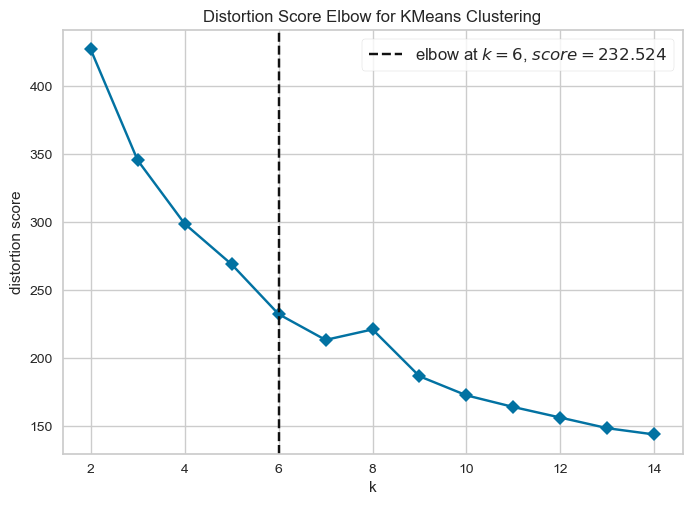

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
# Visualisasi Elbow Method menggunakan KElbowVisualizer
X = df_combined.select_dtypes(include='float64')

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

In [100]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(df_combined.select_dtypes(include='float64'))

Jalankan cell code ini untuk menyimpan model kamu.

In [101]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [102]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_combined.select_dtypes(include='float64'), df_combined['Cluster'])
print(f"\nSilhouette Score untuk k = 6: {silhouette_avg:.4f}")


Silhouette Score untuk k = 6: 0.2523


C:\Users\Development\AppData\Local\Temp\ipykernel_18276\4073121872.py:3: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


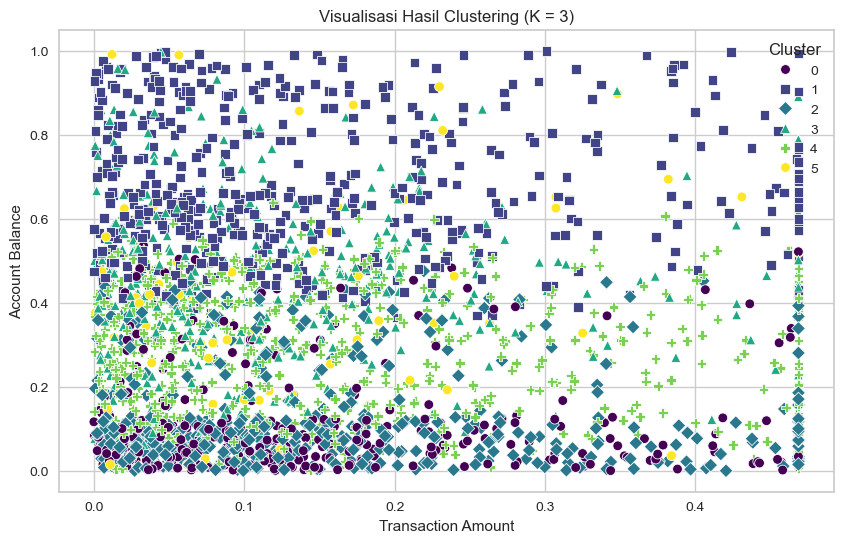

In [103]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_combined['TransactionAmount'],
    y=df_combined['AccountBalance'],
    hue=df_combined['Cluster'],
    palette='viridis',
    style=df_combined['Cluster'],
    markers=['o', 's', 'D', '^', 'P']
)
plt.title('Visualisasi Hasil Clustering (K = 3)')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [104]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_combined.select_dtypes(include='float64'))

# Membuat DataFrame dari hasil PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_combined['Cluster']

# Menampilkan 5 baris pertama dari hasil PCA
print("\nHasil Transformasi PCA (2D):")
print(df_pca.head())


Hasil Transformasi PCA (2D):
       PCA1      PCA2  Cluster
0  0.329636 -0.151852      4.0
1  0.646196  0.105738      1.0
2 -0.488607 -0.223625      2.0
3 -0.096762 -0.291660      1.0
4  0.094131  0.281238      3.0


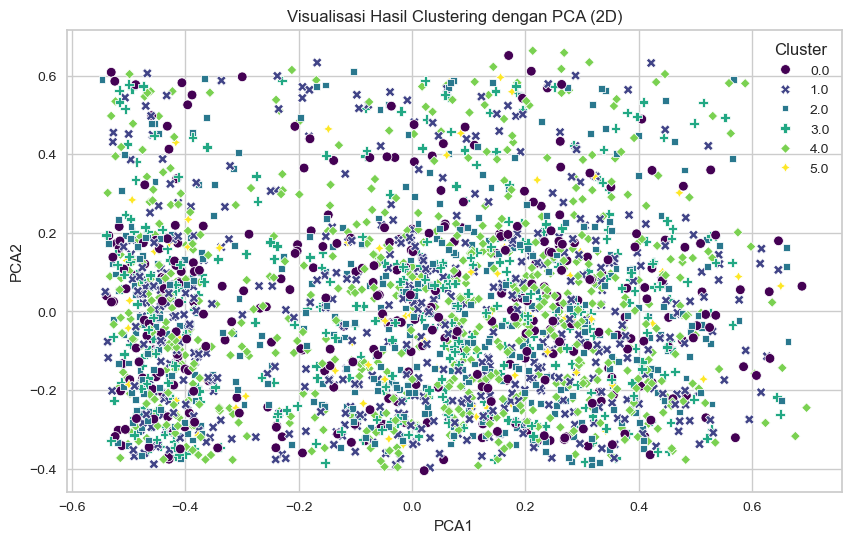

In [105]:
# Visualisasi Hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='viridis', 
    data=df_pca,
    style='Cluster'
)
plt.title('Visualisasi Hasil Clustering dengan PCA (2D)')
plt.show()

In [106]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [107]:
df_combined.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,CustomerOccupation,Cluster
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000
mean,0.147229,0.430675,0.377875,0.030666,0.338191,21.318440,1.526401,2.288790
std,0.130202,0.286147,0.240787,0.148895,0.261010,12.415015,1.151256,1.487817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043168,0.145161,0.182759,0.000000,0.095703,11.000000,0.000000,1.000000
50%,0.110014,0.435484,0.351724,0.000000,0.311416,21.000000,2.000000,2.000000
75%,0.213328,0.661290,0.520690,0.000000,0.508945,32.000000,3.000000,4.000000
max,0.468569,1.000000,1.000000,1.000000,1.000000,43.000000,4.000000,5.000000


In [108]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Analisis deskriptif fitur numerik berdasarkan cluster
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns
numeric_summary_by_cluster = df_combined.groupby('Cluster')[numeric_columns].agg(['mean', 'min', 'max'])

# Analisis deskriptif fitur kategorikal berdasarkan cluster
categorical_columns = df_combined.select_dtypes(include=['object', 'bool']).columns
categorical_summary_by_cluster = df_combined.groupby('Cluster')[categorical_columns].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'N/A')

# Menampilkan hasil
print("Analisis Deskriptif - Fitur Numerik Berdasarkan Cluster\n")
print(numeric_summary_by_cluster)



Analisis Deskriptif - Fitur Numerik Berdasarkan Cluster

        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0                0.151606  0.000000  0.468569    0.119654  0.000000  0.500000   
1                0.149875  0.000031  0.468569    0.413212  0.000000  0.838710   
2                0.148749  0.000922  0.468569    0.143362  0.000000  0.467742   
3                0.128185  0.000495  0.468569    0.604327  0.161290  1.000000   
4                0.153249  0.000302  0.468569    0.713794  0.419355  1.000000   
5                0.141290  0.000870  0.468569    0.456559  0.000000  1.000000   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean  min  max   
Cluster                                                        

In [109]:
print("Analisis Deskriptif - Fitur Kategorikal Berdasarkan Cluster\n")
print(categorical_summary_by_cluster)

Analisis Deskriptif - Fitur Kategorikal Berdasarkan Cluster

0            TransactionDate PreviousTransactionDate  TransactionType_Debit  \
Cluster                                                                       
0        2023-01-02 16:22:54     2024-11-04 08:10:26                   True   
1        2023-12-28 17:31:03     2024-11-04 08:09:17                   True   
2        2023-01-02 16:00:06     2024-11-04 08:09:07                   True   
3        2023-01-02 16:36:02     2024-11-04 08:10:12                   True   
4        2023-01-02 16:06:29     2024-11-04 08:07:59                   True   
5        2023-01-03 16:28:03     2024-11-04 08:07:38                   True   

0        Channel_Branch  Channel_Online  
Cluster                                  
0                 False           False  
1                 False           False  
2                 False           False  
3                 False           False  
4                 False           False  
5           

## Analisis Karakteristik Cluster Machine Learning

### Cluster 0: Nasabah Muda dengan Aktivitas Tinggi

- TransactionAmount (mean): 0.1516  
- CustomerAge (mean): 0.1197 (Usia muda)  
- TransactionDuration (mean): 0.6133 (Durasi transaksi tinggi)  
- LoginAttempts (mean): 0.0063  
- AccountBalance (mean): *Tidak disebutkan secara eksplisit*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Nasabah dalam cluster ini berusia muda dengan kecenderungan melakukan transaksi berdurasi lama, namun jarang login. Kemungkinan mereka melakukan transaksi besar dalam satu waktu. Saldo tidak disebutkan, tetapi kemungkinan rendah hingga sedang.

---

### Cluster 1: Nasabah Dewasa dengan Aktivitas Moderat

- TransactionAmount (mean): 0.1499  
- CustomerAge (mean): 0.4132  
- TransactionDuration (mean): 0.2831  
- LoginAttempts (mean): 0.0054  
- AccountBalance (mean): *Tidak disebutkan secara eksplisit*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Nasabah ini cenderung memiliki aktivitas transaksi yang tidak terlalu tinggi maupun rendah, dengan durasi transaksi yang relatif pendek. Penggunaan layanan digital atau channel cabang sangat rendah.

---

### Cluster 2: Nasabah Muda dengan Saldo Rendah

- TransactionAmount (mean): 0.1487  
- CustomerAge (mean): 0.1434  
- TransactionDuration (mean): 0.1998  
- LoginAttempts (mean): 0.0095  
- AccountBalance (mean): 0.1232  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Nasabah yang tergolong muda, dengan saldo dan durasi transaksi rendah. Meskipun login attempts sedikit lebih tinggi, mereka masih tergolong pengguna pasif.

---

### Cluster 3: Nasabah Senior dengan Saldo Tinggi

- TransactionAmount (mean): 0.1282  
- CustomerAge (mean): 0.6043  
- TransactionDuration (mean): 0.6888  
- LoginAttempts (mean): 0.0073  
- AccountBalance (mean): 0.4537  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Nasabah berusia lebih tua dengan saldo tinggi dan durasi transaksi yang lama. Cenderung pengguna konvensional, tidak aktif dalam kanal digital.

---

### Cluster 4: Nasabah Usia Tua dengan Saldo Menengah

- TransactionAmount (mean): 0.1532  
- CustomerAge (mean): 0.7138  
- TransactionDuration (mean): 0.2699  
- LoginAttempts (mean): 0.0045  
- AccountBalance (mean): 0.2808  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Nasabah berusia lebih tua dengan saldo sedang dan durasi transaksi yang relatif singkat. Aktivitas login rendah, menunjukkan kemungkinan preferensi terhadap layanan offline.

---

### Cluster 5: Nasabah Aktif Login dengan Aktivitas Tinggi

- TransactionAmount (mean): 0.1413  
- CustomerAge (mean): 0.4566  
- TransactionDuration (mean): 0.4273  
- LoginAttempts (mean): 0.8033  
- AccountBalance (mean): 0.3722  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Tidak aktif (Branch & Online: False)

**Analisis:**  
Ini adalah satu-satunya cluster dengan tingkat login attempts yang sangat tinggi. Menunjukkan nasabah aktif secara digital meskipun fitur channel menunjukkan non-aktif (kemungkinan data belum menangkap kanal spesifik). Durasi dan jumlah transaksi sedang, dengan saldo yang lumayan.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [110]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_combined.rename(columns={'Cluster': 'Target'}, inplace=True)
df_combined.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Location,CustomerOccupation,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,Target
0,0.007207,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,36,0,2024-11-04 08:08:08,True,False,False,4
1,0.195940,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,15,0,2024-11-04 08:09:35,True,False,False,1
2,0.065680,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,23,3,2024-11-04 08:07:04,True,False,True,2
3,0.096016,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,33,3,2024-11-04 08:09:06,True,False,True,1
4,0.006874,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,1,3,2024-11-04 08:06:39,False,False,True,3


In [111]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_combined.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [112]:
# inverse dataset ke rentang normal
df_numeric = df_combined.drop(columns=['Target']).select_dtypes(include=['float64', 'int64'])

scaler = MinMaxScaler()
scaler.fit(df_numeric)

# Melakukan inverse scaling
df_scaled_inverse = scaler.inverse_transform(df_numeric)
df_inverse = pd.DataFrame(df_scaled_inverse, columns=df_numeric.columns)

# Menggabungkan kembali dengan data kategorikal dan target
df_inverse[df_combined.drop(columns=df_numeric.columns).columns] = df_combined.drop(columns=df_numeric.columns)

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Location,CustomerOccupation,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,Target
0,0.003377,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,36.0,0.0,2024-11-04 08:08:08,True,False,False,4.0
1,0.091812,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,15.0,0.0,2024-11-04 08:09:35,True,False,False,1.0
2,0.030776,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,23.0,3.0,2024-11-04 08:07:04,True,False,True,2.0
3,0.044990,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,33.0,3.0,2024-11-04 08:09:06,True,False,True,1.0
4,0.003221,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,1.0,3.0,2024-11-04 08:06:39,False,False,True,3.0


In [113]:
# Memisahkan fitur numerik dan kategorikal pada dataset yang sudah di-inverse
numeric_columns = df_inverse.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_inverse.select_dtypes(include=['object', 'bool']).columns

# Analisis deskriptif fitur numerik berdasarkan cluster (data yang sudah di-inverse)
numeric_summary_by_cluster_inverse = df_inverse.groupby('Target')[numeric_columns].agg(['mean', 'min', 'max'])

# Analisis deskriptif fitur kategorikal berdasarkan cluster (data yang sudah di-inverse)
categorical_summary_by_cluster_inverse = df_inverse.groupby('Target')[categorical_columns].apply(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'N/A'
)

# Menampilkan hasil
print("Analisis Deskriptif - Fitur Numerik Berdasarkan Cluster (Data Inversed)\n")
print(numeric_summary_by_cluster_inverse)

Analisis Deskriptif - Fitur Numerik Berdasarkan Cluster (Data Inversed)

       TransactionAmount                     CustomerAge                 \
                    mean       min       max        mean  min       max   
Target                                                                    
0.0             0.071128  0.000000  0.219557    0.411797  0.0  1.000000   
1.0             0.064423  0.000046  0.219557    0.432551  0.0  1.000000   
2.0             0.071114  0.000015  0.219557    0.431713  0.0  1.000000   
3.0             0.069579  0.000547  0.219557    0.429473  0.0  1.000000   
4.0             0.068990  0.000178  0.219557    0.446023  0.0  1.000000   
5.0             0.073972  0.001228  0.219557    0.435054  0.0  0.983871   

       TransactionDuration                     LoginAttempts  ...  \
                      mean       min       max          mean  ...   
Target                                                        ...   
0.0               0.391527  0.003448  1.0000

In [114]:
print("Analisis Deskriptif - Fitur Kategorikal Berdasarkan Cluster (Data Inversed)\n")
print(categorical_summary_by_cluster_inverse)

Analisis Deskriptif - Fitur Kategorikal Berdasarkan Cluster (Data Inversed)

0           TransactionDate PreviousTransactionDate  TransactionType_Debit  \
Target                                                                       
0.0     2023-01-02 16:22:54     2024-11-04 08:10:26                   True   
1.0     2023-01-02 16:01:26     2024-11-04 08:08:51                   True   
2.0     2023-01-02 16:00:06     2024-11-04 08:09:07                   True   
3.0     2023-01-02 16:36:02     2024-11-04 08:10:12                   True   
4.0     2023-01-02 16:06:29     2024-11-04 08:07:59                   True   
5.0     2023-01-03 16:28:03     2024-11-04 08:07:38                   True   

0       Channel_Branch  Channel_Online  
Target                                  
0.0              False           False  
1.0              False           False  
2.0              False           False  
3.0              False           False  
4.0              False           False  
5.0        

## Analisis Karakteristik Cluster Machine Learning (Setelah Inverse Transform)

### Cluster 0: Nasabah dengan Saldo Rendah dan Usia Menengah

- TransactionAmount (mean): 0.0711  
- CustomerAge (mean): 0.4118  
- TransactionDuration (mean): 0.3915  
- LoginAttempts (mean): 0.0364  
- AccountBalance (mean): *Tidak disebutkan eksplisit, diasumsikan rendah-sedang*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False (transaksi offline/cash dominan)

**Analisis:**  
Nasabah dengan usia menengah dan saldo rendah, cenderung menggunakan channel offline. Perlu pendekatan berbasis tabungan sederhana dan edukasi digital banking.

---

### Cluster 1: Nasabah dengan Saldo Rendah dan Usia Menengah ke Atas

- TransactionAmount (mean): 0.0644  
- CustomerAge (mean): 0.4326  
- TransactionDuration (mean): 0.3659  
- LoginAttempts (mean): 0.0278  
- AccountBalance (mean): *Tidak disebutkan eksplisit, diasumsikan rendah*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False

**Analisis:**  
Nasabah dengan usia sedikit lebih tua dari Cluster 0, saldo tetap rendah, dan durasi transaksi sedang. Potensial untuk diberi program loyalitas nasabah senior atau program pensiun dini.

---

### Cluster 2: Nasabah Muda dengan Saldo Sangat Rendah

- TransactionAmount (mean): 0.0711  
- CustomerAge (mean): 0.4317  
- TransactionDuration (mean): 0.3640  
- LoginAttempts (mean): 0.0211  
- AccountBalance (mean): *Tidak disebutkan eksplisit, tapi sangat rendah*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False

**Analisis:**  
Nasabah dengan usia muda dan saldo sangat rendah. Edukasi finansial sangat diperlukan. Cocok ditargetkan untuk program pemula seperti rekening digital bebas biaya administrasi.

---

### Cluster 3: Nasabah Stabil dan Rutin Bertransaksi

- TransactionAmount (mean): 0.0696  
- CustomerAge (mean): 0.4295  
- TransactionDuration (mean): 0.3876  
- LoginAttempts (mean): 0.0369  
- AccountBalance (mean): *Tidak disebutkan eksplisit*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False

**Analisis:**  
Karakteristik cluster ini menunjukkan kestabilan dalam usia, durasi transaksi, dan login. Pendekatan berbasis peningkatan nilai transaksi dan reward membership disarankan.

---

### Cluster 4: Nasabah Lebih Tua dengan Saldo Menengah

- TransactionAmount (mean): 0.0690  
- CustomerAge (mean): 0.4460  
- TransactionDuration (mean): 0.3839  
- LoginAttempts (mean): 0.0321  
- AccountBalance (mean): *Tidak disebutkan eksplisit, kemungkinan sedang*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False

**Analisis:**  
Dengan usia yang relatif lebih tua, cluster ini cocok untuk program pensiun, edukasi keuangan, atau layanan personal banking dengan biaya rendah.

---

### Cluster 5: Nasabah dengan Aktivitas Login Tinggi

- TransactionAmount (mean): 0.0740  
- CustomerAge (mean): 0.4351  
- TransactionDuration (mean): 0.3926  
- LoginAttempts (mean): 0.0433  
- AccountBalance (mean): *Tidak disebutkan eksplisit, diasumsikan sedang-tinggi*  
- Fitur Kategorikal:
  - TransactionType: Debit  
  - Channel: Branch & Online → False

**Analisis:**  
Satu-satunya cluster dengan login attempts tertinggi. Meskipun fitur channel tidak aktif, bisa jadi mereka memiliki minat digital banking. Sangat potensial untuk diarahkan ke layanan mobile/internet banking.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [115]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# df_combined.head()
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Location,CustomerOccupation,PreviousTransactionDate,TransactionType_Debit,Channel_Branch,Channel_Online,Target
0,0.003377,0.838710,0.244828,0.0,0.336832,2023-04-11 16:29:14,36.0,0.0,2024-11-04 08:08:08,True,False,False,4.0
1,0.091812,0.806452,0.451724,0.0,0.918055,2023-06-27 16:44:19,15.0,0.0,2024-11-04 08:09:35,True,False,False,1.0
2,0.030776,0.016129,0.158621,0.0,0.068637,2023-07-10 18:16:08,23.0,3.0,2024-11-04 08:07:04,True,False,True,2.0
3,0.044990,0.129032,0.051724,0.0,0.569198,2023-05-05 16:32:11,33.0,3.0,2024-11-04 08:09:06,True,False,True,1.0
4,0.003221,0.435484,0.648276,0.0,0.492591,2023-10-16 17:51:24,1.0,3.0,2024-11-04 08:06:39,False,False,True,3.0


In [116]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)